# E-commerce Shopping Behavior Analysis

**Goal:** Practice Pandas data manipulation and Seaborn/Matplotlib visualization to understand customer habits.

### 1. Imports

Import necessary libraries for data manipulation (Pandas, NumPy), visualization (Matplotlib, Seaborn), and file path handling (Pathlib).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display, Markdown

### 2. Plotting Configuration

Set global styles for consistency across all visualizations. We'll use Seaborn's `whitegrid` style and define a default figure size using Matplotlib's `rcParams` (rc).

In [3]:
# Set global visual preferences for plots
sns.set_style('whitegrid')
# Use plt.rc to configure runtime settings - set default figure size
plt.rc('figure', figsize=(10, 6))

### 3. Define Project Paths

Establish robust, relative file paths using `pathlib.Path` to ensure the notebook can correctly locate the data directory, regardless of where the project is located on the filesystem.

In [14]:
# --- Define Paths Robustly ---
notebook_dir = Path.cwd()
project_root = notebook_dir.parent
data_dir = project_root / 'data'
figures_dir = project_root / 'figures'

print(f"Project Root: {project_root}")
print(f"Data Directory: {data_dir}")
print(f"Figures Directory: {figures_dir}")

Project Root: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis
Data Directory: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/data
Figures Directory: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/figures


### 4. Load Data Dynamically

The following cell loads the primary dataset. It uses `pathlib.glob` to automatically find the correct `.csv` file within the `/data/` directory, making the notebook robust to potential filename changes in future dataset versions. It also includes error handling for cases where the CSV file is missing or multiple CSVs are present.

In [5]:
csv_file_path = None
df = None # Initialize df to None

try:
    # Use glob to find all files ending in .csv (case-insensitive) in the data directory
    csv_files = list(data_dir.glob('*.csv')) + list(data_dir.glob('*.CSV')) 
    
    if not csv_files:
        print(f"❌ Error: No CSV file found in the directory: {data_dir}")
        print("Please ensure you have downloaded the dataset CSV and placed it there.")
    elif len(csv_files) > 1:
        print(f"⚠️ Warning: Multiple CSV files found in {data_dir}. Using the first one found:")
        print([f.name for f in csv_files])
        csv_file_path = csv_files[0] # Default to the first one
    else:
        # Exactly one CSV file found
        csv_file_path = csv_files[0]
        print(f"Found CSV file: {csv_file_path.name}")

    # Proceed to load if a path was determined
    if csv_file_path:
        print(f"Loading data from: {csv_file_path}")
        df = pd.read_csv(csv_file_path)
        print("✅ Data loaded successfully!")
        display(df.head())

except Exception as e:
    print(f"❌ An unexpected error occurred while finding or loading the data: {e}")

# Optional: Check if df was loaded successfully before proceeding
if df is None:
     print("\nStopping analysis because data failed to load.")
     # You might want to stop execution here in a real script, 
     # or just be aware that df is None in the notebook.

Found CSV file: shopping_behavior_updated.csv
Loading data from: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/data/shopping_behavior_updated.csv
✅ Data loaded successfully!


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


### 5. Initial Data Inspection

In [6]:
# Check data types and non-null counts
print("--- Data Info ---")
df.info()

print("\n--- Missing Values Check ---")
print(df.isnull().sum())

--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used       

In [7]:
# Extract the values
num_rows = df.shape[0]
num_cols = df.shape[1]
has_missing_values = df.isnull().any().any() 

# Build the Markdown string
markdown_text_shape_null = f"""
**Observations (Shape & Missing Values):**

* **Shape:** The dataset contains **{num_rows:,} rows** and **{num_cols} columns**. 
* **Missing Values:** {'✅ **No missing values** found.' if not has_missing_values else '⚠️ **Warning! Missing values detected.** Check the output above.'}
* **Data Types:** *(See `df.info()` output above for details)*. A mix of numerical (`int64`, `float64`) and categorical (`object`) types are present.
"""

# Display the generated string as Markdown
display(Markdown(markdown_text_shape_null))


**Observations (Shape & Missing Values):**

* **Shape:** The dataset contains **3,900 rows** and **18 columns**. 
* **Missing Values:** ✅ **No missing values** found.
* **Data Types:** *(See `df.info()` output above for details)*. A mix of numerical (`int64`, `float64`) and categorical (`object`) types are present.


In [8]:
# Get summary statistics for numerical columns
print("\n--- Numerical Summary ---")
display(df.describe())


--- Numerical Summary ---


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


**Insights from Numerical Summary:**

* **Age:** Ranges from **18** to **70**, with a mean and median both around **44**, suggesting a fairly symmetrical age distribution.
* **Purchase Amount (USD):** Varies from **\$20** to **\$100**, averaging about **\$59.76**. The median is **\$60**, very close to the mean, indicating low skewness in spending.
* **Review Rating:** Ranges from **2.5** to **5.0**, with a mean of **3.75**. The distribution seems slightly left-skewed (more higher ratings), as the mean is close to the median (3.7).
* **Previous Purchases:** Customers have made between **1** and **50** previous purchases, with both the mean and median around **25**, suggesting a relatively uniform distribution here.

In [9]:
print("\n--- Categorical Summary ---")
display(df.describe(include='object'))


--- Categorical Summary ---


,Gender,Item Purchased,Category,Location,Size,Color,Season,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Payment Method,Frequency of Purchases
count,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900,3900
unique,2,25,4,50,4,25,4,2,6,2,2,6,7
top,Male,Blouse,Clothing,Montana,M,Olive,Spring,No,Free Shipping,No,No,PayPal,Every 3 Months
freq,2652,171,1737,96,1755,177,999,2847,675,2223,2223,677,584


**Insights from Categorical Summary:**

* **Gender:** The dataset is predominantly **Male** (2652 out of 3900).
* **Most Frequent Items:** **Blouse** is the most purchased item (171 times), within the most frequent **Clothing** category (1737 times). There are 25 unique items listed.
* **Location:** **Montana** is the top location (96 times) out of 50 unique locations.
* **Size:** **M** (Medium) is the most common size (1755 times).
* **Color:** **Olive** is the most frequent color (177 times) out of 25 unique colors.
* **Season:** Most purchases occur in **Spring** (999 times).
* **Subscription:** Most customers do **not** have a subscription (**No**: 2847 times).
* **Shipping:** **Free Shipping** is the most common type (675 times).
* **Discounts/Promos:** Most purchases were made **without** a discount or promo code applied (**No**: 2223 times for both).
* **Payment:** **PayPal** is the most popular payment method (677 times).
* **Purchase Frequency:** The most common frequency is **Every 3 Months** (584 times).

### 6. Data Cleaning: Standardize Column Names

The current column names contain spaces, parentheses, and mixed casing (e.g., `Purchase Amount (USD)`). This makes them slightly awkward to use in code (requiring bracket notation like `df['Purchase Amount (USD)']` instead of dot notation like `df.purchase_amount_usd`).

As a standard data cleaning practice, we will convert all column names to **snake_case**. This involves:
1.  Converting all characters to lowercase.
2.  Replacing spaces and special characters (like parentheses) with underscores (`_`).
3.  Removing any trailing underscores.

This consistent format makes the code cleaner and easier to write.

In [10]:
# --- Standardize Column Names ---

# 1. Get the current list of column names
original_columns = df.columns
print("Original Columns:\n", original_columns)

# 2. Create a new list to store the cleaned names
new_columns = []

# 3. Iterate through each original column name
for col in original_columns:
    # a. Convert the entire string to lowercase
    clean_col = col.lower()
    # b. Replace spaces with underscores
    clean_col = clean_col.replace(' ', '_')
    # c. Replace '(' with an underscore
    clean_col = clean_col.replace('(', '_')
    # d. Replace ')' with an empty string (remove it)
    clean_col = clean_col.replace(')', '')
    # e. Remove any potential double underscores resulting from replacements
    clean_col = clean_col.replace('__', '_')
    # f. Remove any underscore that might be left at the very end
    clean_col = clean_col.strip('_')
    # g. Add the cleaned name to our new list
    new_columns.append(clean_col)

# 4. Assign the new list of names back to the DataFrame's columns attribute
df.columns = new_columns

# 5. Verify the changes by displaying the first row with new column names
print("\nCleaned Columns:\n", df.columns)
print("\n--- DataFrame with Cleaned Columns ---")
display(df.head(1))

Original Columns:
 Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

Cleaned Columns:
 Index(['customer_id', 'age', 'gender', 'item_purchased', 'category',
       'purchase_amount_usd', 'location', 'size', 'color', 'season',
       'review_rating', 'subscription_status', 'shipping_type',
       'discount_applied', 'promo_code_used', 'previous_purchases',
       'payment_method', 'frequency_of_purchases'],
      dtype='object')

--- DataFrame with Cleaned Columns ---


,customer_id,age,gender,item_purchased,category,purchase_amount_usd,location,size,color,season,review_rating,subscription_status,shipping_type,discount_applied,promo_code_used,previous_purchases,payment_method,frequency_of_purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly


### 7. Univariate Analysis: Numerical Variables

Explore the distribution of key numerical features like age, purchase amount, review rating, and previous purchases.

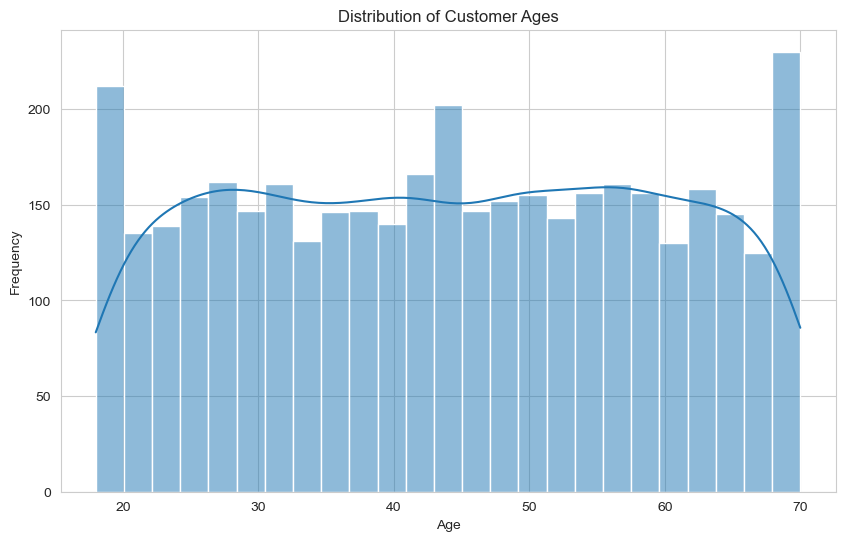

In [21]:
# Explore the distribution of customer ages
sns.histplot(data=df, x='age', bins=25, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Next, let's examine the distribution of purchase amounts. This will show us the typical spending range per transaction and identify if spending is concentrated around certain values.

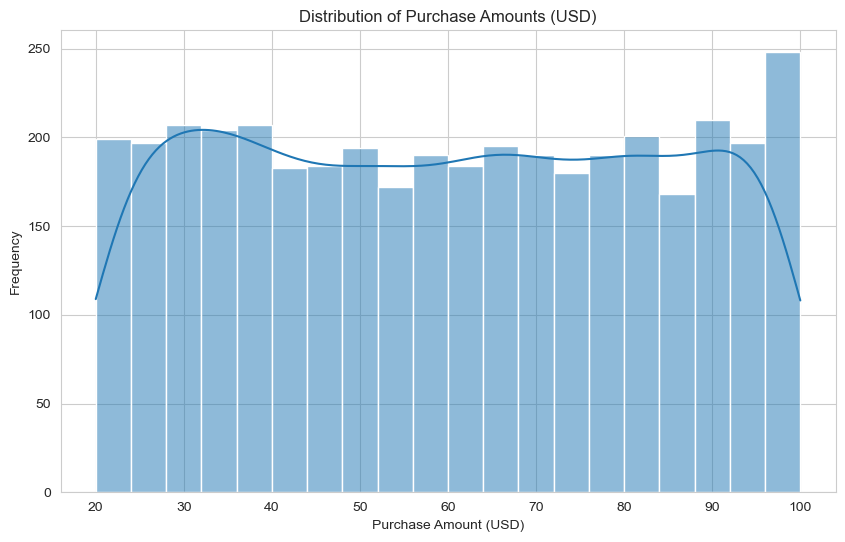

Plot saved to: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/figures/purchase_amount_distribution.png


In [24]:
# --- Univariate Analysis: Purchase Amount ---

# Create a histogram for the 'purchase_amount_usd' column
# Using kde=True adds a smooth line estimating the distribution
sns.histplot(data=df, x='purchase_amount_usd', bins=20, kde=True) 
plt.title('Distribution of Purchase Amounts (USD)')
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Frequency')

# Define the save path for this plot
save_path_amount = figures_dir / 'purchase_amount_distribution.png'

# Save the figure before showing it
plt.savefig(save_path_amount, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved to: {save_path_amount}")

Let's analyze the distribution of review ratings. This tells us about overall customer satisfaction. Are ratings typically high, low, or spread out?

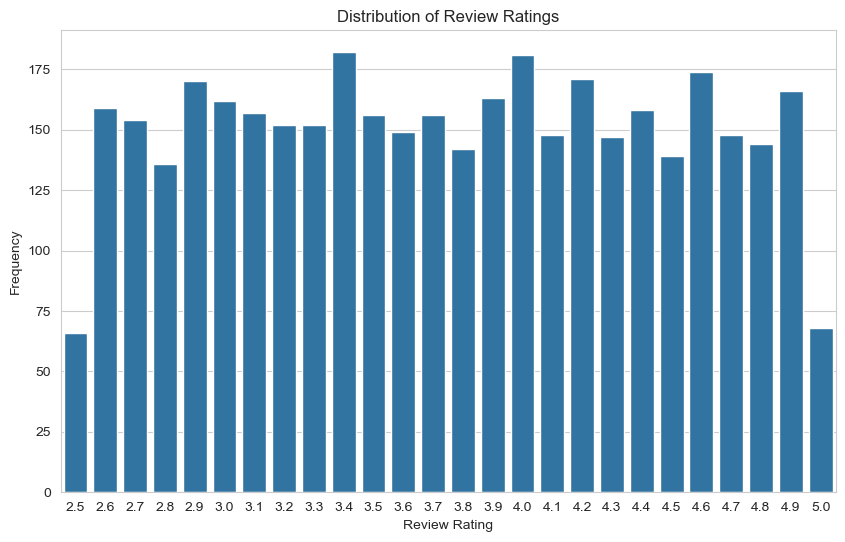

Plot saved to: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/figures/review_rating_distribution.png


In [27]:
# --- Univariate Analysis: Review Rating ---

# Create a histogram for the 'review_rating' column
# We can use discrete bins or let histplot choose appropriate ones.
# kde=False might be clearer here as ratings aren't perfectly continuous.
# sns.histplot(data=df, x='review_rating', kde=False, bins=10) # Using fewer bins might group similar ratings


# Alternative: A countplot might be better for discrete-like values
sns.countplot(data=df, x='review_rating') #, palette='viridis') 
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')

# Define the save path
save_path_rating = figures_dir / 'review_rating_distribution.png'

# Save the figure
plt.savefig(save_path_rating, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved to: {save_path_rating}")

Finally, let's look at the distribution of `previous_purchases`. This helps us understand customer loyalty or tenure. Do we have mostly new customers, mostly returning customers, or a mix?

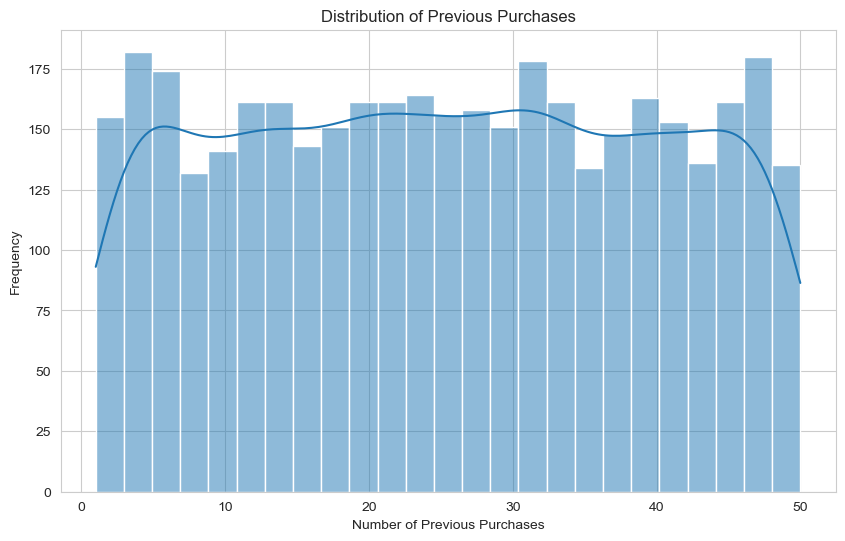

Plot saved to: /home/prof-adept/Shared/Alpha/Programming/Python/Data Science Projects/ecommerce-analysis/figures/previous_purchases_distribution.png


In [28]:
# --- Univariate Analysis: Previous Purchases ---

# Create a histogram for the 'previous_purchases' column
sns.histplot(data=df, x='previous_purchases', bins=25, kde=True) # Using 25 bins for a range of 1-50

plt.title('Distribution of Previous Purchases')
plt.xlabel('Number of Previous Purchases')
plt.ylabel('Frequency')

# Define the save path
save_path_prev_purchases = figures_dir / 'previous_purchases_distribution.png'

# Save the figure
plt.savefig(save_path_prev_purchases, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved to: {save_path_prev_purchases}")

To specifically demonstrate Matplotlib's capabilities, let's create a pie chart showing the proportion of customers based on their `subscription_status`. Pie charts are effective for visualizing parts of a whole for a single categorical variable with few categories.